Things to make:

1. Map of ecozones
2. CSV files for FWI percentiles and ecoregions
3. Plot of percentile trends for boreal shield
4. CSV files for:
    1. PSD
    2. Days when FWI > 19
    3. Days when FWI > 13

In [1]:
import xarray as xr
import numpy as np
import time
import pandas as pd
from matplotlib import pyplot as plt

---
### Mean of sub-indices May-June

In [4]:
for var in ['ffmc', 'dmc', 'dc', 'isi', 'bui']:
    print(var)
    da = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_wildfires_'+
                         f'physics/live/tk/era5/{var}_era5_19400101_20230630.nc')[var]
    regions = xr.open_dataset('HFRZ.nc')
    valid_codes = np.unique(regions.region_codes)[:-1]


    for code in valid_codes:
        print('\t',code)
        mask = (regions.region_codes == code)
        masked_da = da.where(mask)
        masked_da = masked_da.sel(time = np.logical_or((da.time.dt.month == 5),
                                                       (da.time.dt.month == 6)))

        qs = masked_da.resample(time = '1Y').quantile(
            0.99,
            dim = ('time', 'latitude', 'longitude')).to_numpy()

        df = pd.DataFrame({'year': np.arange(1940,2024),
                           f'{var}_q99': qs})
        df.to_csv(f'subindices_by_hfrz/{var}_q99_{code}.csv')

ffmc
	 EJB
	 ES
	 ET
	 GBL
	 GSL
	 IC
	 LA


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


	 LW
	 NAT
	 P
	 SC
	 SP
	 SY


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


	 WJB
	 WO
	 WS


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


dmc
	 EJB
	 ES
	 ET
	 GBL
	 GSL
	 IC
	 LA


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


	 LW
	 NAT
	 P
	 SC
	 SP
	 SY


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


	 WJB
	 WO
	 WS


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


dc
	 EJB
	 ES
	 ET
	 GBL
	 GSL
	 IC
	 LA


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


	 LW
	 NAT
	 P
	 SC
	 SP
	 SY


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


	 WJB
	 WO
	 WS


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


isi
	 EJB
	 ES
	 ET
	 GBL
	 GSL
	 IC
	 LA


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


	 LW
	 NAT
	 P
	 SC
	 SP
	 SY


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


	 WJB
	 WO
	 WS


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


bui
	 EJB
	 ES
	 ET
	 GBL
	 GSL
	 IC
	 LA


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


	 LW
	 NAT
	 P
	 SC
	 SP
	 SY


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


	 WJB
	 WO
	 WS


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


---

#### 99th Daily Percentile for Region in May-June

In [14]:
da = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_wildfires_'+
                     'physics/live/tk/era5/fwi_era5_19400101_20230630.nc')['fwi']
regions = xr.open_dataset('HFRZ.nc')
valid_codes = np.unique(regions.region_codes)[:-1]

quantile_list = []

for code in valid_codes:
    print(code)
    mask = (regions.region_codes == code)
    masked_da = da.where(mask)
    masked_da = masked_da.sel(time = np.logical_or((da.time.dt.month == 5),
                                                   (da.time.dt.month == 6)))
    
    qs = masked_da.resample(time = '1Y').quantile(
        0.99,
        dim = ('time', 'latitude', 'longitude')).to_numpy()
    
    df = pd.DataFrame({'year': np.arange(1940,2024),
                       'FWI99': qs})
    df.to_csv(f'quantiles_by_hfrz/fwi99_{code}.csv')

EJB
ES
ET
GBL
GSL
IC
LA


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


LW
NAT
P
SC
SP
SY


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


WJB
WO
WS


/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1559: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,


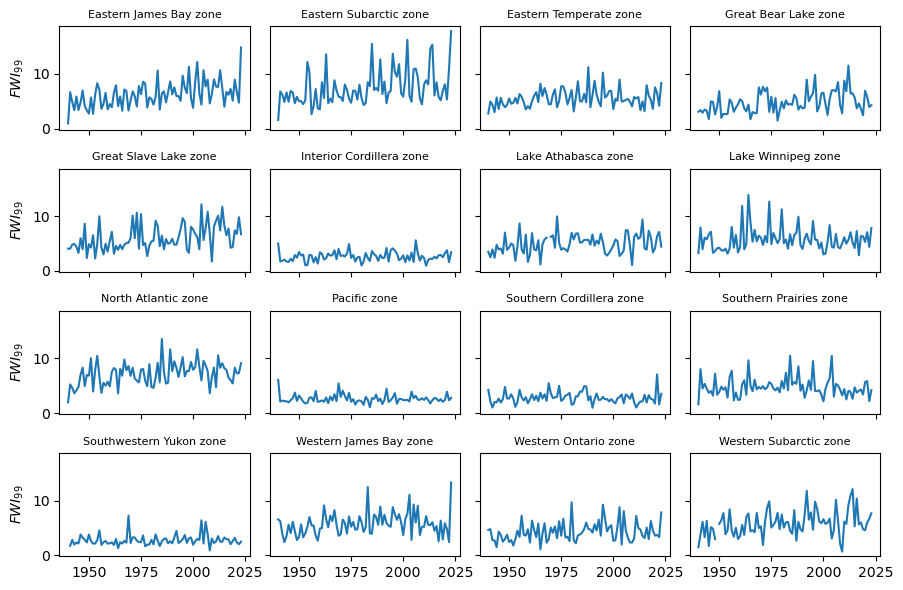

In [15]:
regions = xr.open_dataset('HFRZ.nc')
valid_codes = np.unique(regions.region_codes)[:-1]
valid_names = np.unique(regions.region_names)[:-1]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(9,6), sharex=True, sharey=True)

for i,ax in enumerate(axs.ravel()):
    code = valid_codes[i]
    name = valid_names[i]
    df = pd.read_csv(f'quantiles_by_hfrz/fwi99_{code}.csv')
    ax.plot(df.year, df.FWI99)
    ax.set_title(name, fontsize = 8)
    if i%4==0:
        ax.set_ylabel('$FWI_{99}$')
plt.tight_layout()
plt.savefig('FWI99_HFRZ.png', facecolor = 'white', bbox_inches = 'tight')

---

#### Area Exceeding 99th Percentile in May-June by region

In [2]:
da = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_wildfires_'+
                     'physics/live/tk/era5/fwi_era5_19400101_20230630.nc')['fwi']
da = da.sel(time = np.logical_or((da.time.dt.month == 5),
                                 (da.time.dt.month == 6))).load()

quant_map_99   = da.quantile(0.99, dim = 'time')

regions = xr.open_dataset('HFRZ.nc')
valid_codes = np.unique(regions.region_codes)[:-1]

areas = xr.open_dataset('cell_area.nc')['cell_area'].to_numpy()

/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [14]:
for code in valid_codes:
    print(code)
    mask = (regions.region_codes == code)
    masked_da = da.where(mask)
    
    years = []
    data_99 = []
    
    for year in np.unique(da.time.dt.year):
        years.append(year)
        temp = masked_da.sel(time = (masked_da.time.dt.year == year))
        
        exceedances = np.sum(temp > quant_map_99, axis = 0)
        exceeded_area = np.sum(exceedances.to_numpy() * areas / 10**6)
        data_99.append(exceeded_area)
        
        del temp
    
    df = pd.DataFrame({'year': years,
                       'cumulative_area_exceeding_km2_FWI99': data_99})
    df.to_csv(f'exceedance_by_hfrz/exceedances_{code}.csv')

EJB
ES
ET
GBL
GSL
IC
LA
LW
NAT
P
SC
SP
SY
WJB
WO
WS


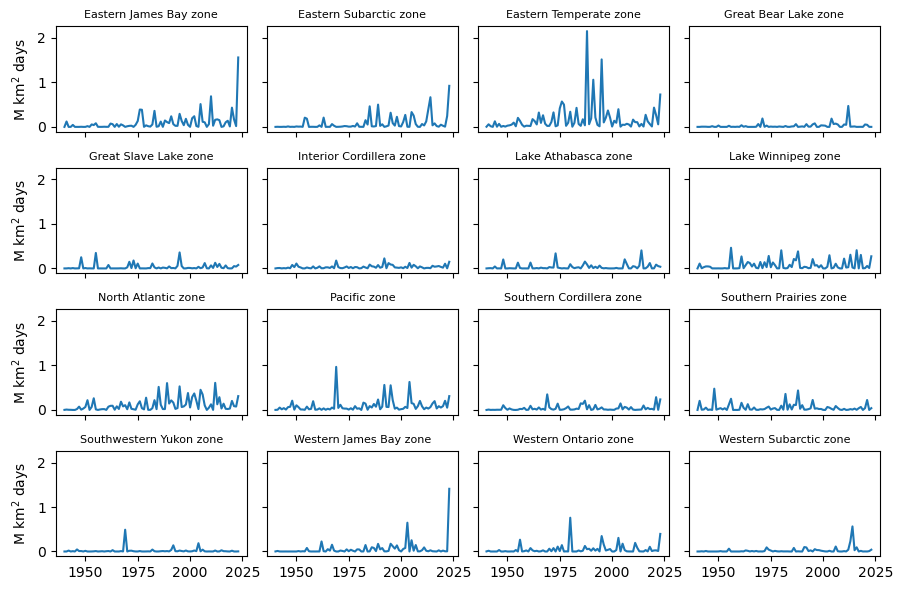

In [15]:
valid_codes = np.unique(regions.region_codes)[:-1]
valid_names = np.unique(regions.region_names)[:-1]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(9,6), sharex=True, sharey=True)

for i,ax in enumerate(axs.ravel()):
    code = valid_codes[i]
    name = valid_names[i]
    df = pd.read_csv(f'exceedance_by_hfrz/exceedances_{code}.csv')
    ax.plot(df.year, df.cumulative_area_exceeding_km2_FWI99 / 10 ** 6)
    ax.set_title(name, fontsize = 8)
    if i%4==0:
        ax.set_ylabel('M km$^2$ days')
plt.tight_layout()
plt.savefig('exceedances_HFRZ.png', facecolor = 'white', bbox_inches = 'tight')

---

#### Area Exceeding 99th Percentile in May-June

In [11]:
da = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_wildfires_'+
                     'physics/live/tk/era5/fwi_era5_19400101_20230630.nc')['fwi']
da = da.sel(time = np.logical_or((da.time.dt.month == 5),
                                 (da.time.dt.month == 6)))

quant_map_90   = da.quantile(0.9, dim = 'time')
quant_map_99   = da.quantile(0.99, dim = 'time')
quant_map_999  = da.quantile(0.999, dim = 'time')
quant_map_9999 = da.quantile(0.9999, dim = 'time')

areas = xr.open_dataset('cell_area.nc')['cell_area'].to_numpy()

/rds/general/user/tk22/home/miniconda3/envs/firepy/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [22]:
quant_map_9999.to_netcdf('quantiles_by_hfrz/percentile_9999_map.nc')

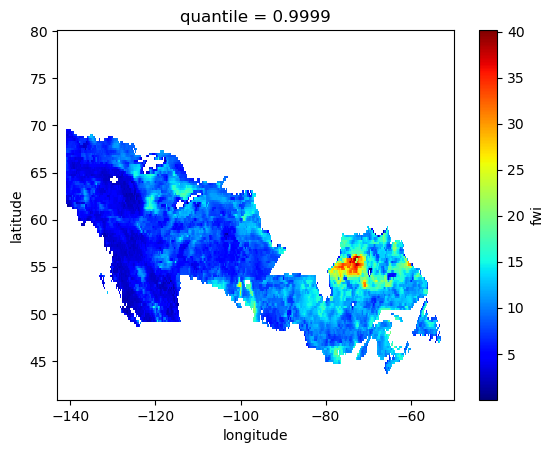

In [18]:
mask = np.logical_not(xr.open_dataset('HFRZ.nc').region_codes == 'nan')

quant_map_9999.where(mask).plot(cmap = 'jet')

In [14]:
mask = np.logical_not(xr.open_dataset('HFRZ.nc').region_codes == 'nan')

In [9]:
masked_da = da.where(mask)

In [10]:
years = []
data_90 = []
data_99 = []
data_999 = []
data_9999 = []

for year in np.unique(da.time.dt.year):
    years.append(year)
    temp = masked_da.sel(time = (masked_da.time.dt.year == year))
    
    exceedances = np.sum(temp > quant_map_90, axis = 0)
    exceeded_area = np.sum(exceedances.to_numpy() * areas / 10**6)
    data_90.append(exceeded_area)
    
    exceedances = np.sum(temp > quant_map_99, axis = 0)
    exceeded_area = np.sum(exceedances.to_numpy() * areas / 10**6)
    data_99.append(exceeded_area)
    
    exceedances = np.sum(temp > quant_map_999, axis = 0)
    exceeded_area = np.sum(exceedances.to_numpy() * areas / 10**6)
    data_999.append(exceeded_area)
    
    exceedances = np.sum(temp > quant_map_9999, axis = 0)
    exceeded_area = np.sum(exceedances.to_numpy() * areas / 10**6)
    data_9999.append(exceeded_area)

df = pd.DataFrame({'year': years,
                   'cumulative_area_exceeding_km2_FWI90': data_90,
                   'cumulative_area_exceeding_km2_FWI99': data_99,
                   'cumulative_area_exceeding_km2_FWI99pt9': data_999,
                   'cumulative_area_exceeding_km2_FWI99pt99': data_9999})

df.to_csv('cumulative_area_exceeding_percentile.csv')

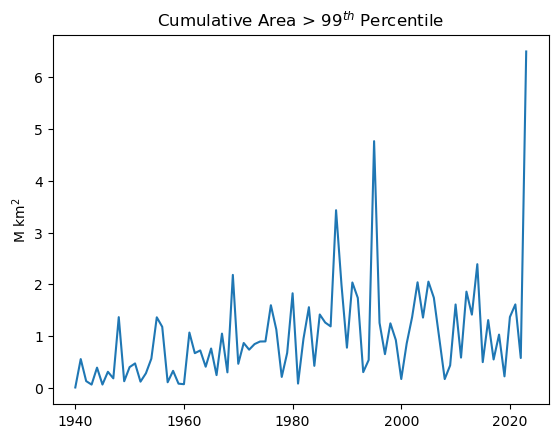

In [11]:
df = pd.read_csv('cumulative_area_exceeding_percentile.csv')

plt.title('Cumulative Area > 99$^{th}$ Percentile')

plt.plot(df.year, df.cumulative_area_exceeding_km2_FWI99/10**6)
plt.ylabel('M km$^2$')
plt.savefig('cumulative_exeedance_of_FWI99.png', facecolor = 'white', bbox_inches = 'tight')

---


#### Mean cumDSR in May-June by HFR:

In [13]:
ds = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_wildfires_'+
                     'physics/live/tk/era5/fwi_era5_19400101_20230630.nc')
DSR = 0.0272 * ds.fwi.to_numpy() ** 1.77
output = xr.Dataset(data_vars = {'dsr': (['time', 'latitude', 'longitude'], DSR)},
                    coords = {'time': ds.time.data,
                              'latitude': ds.latitude.data,
                              'longitude': ds.longitude.data})
output.to_netcdf('/rds/general/user/tk22/projects/leverhulme_wildfires_'+
                 'physics/live/tk/era5/dsr_era5_19400101_20230630.nc')

In [3]:
da = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_wildfires_'+
                     'physics/live/tk/era5/dsr_era5_19400101_20230630.nc')['dsr']
regions = xr.open_dataset('HFRZ.nc')
valid_codes = np.unique(regions.region_codes)[:-1]

areas = xr.open_dataset('cell_area.nc').cell_area.to_numpy()
areas = np.repeat(areas[np.newaxis,:,:], len(np.unique(da.time.dt.year)), axis = 0)

cum_dsr_list = []

for code in valid_codes:
    print(code)
    mask = (regions.region_codes == code)
    masked_dsr = da.where(mask)
    masked_dsr = masked_dsr.sel(time = np.logical_or((da.time.dt.month == 5),
                                                     (da.time.dt.month == 6)))
    
    masked_cum_dsr = masked_dsr.groupby('time.year').sum(dim = 'time').where(mask).to_numpy()
    masked_cum_dsr = np.ma.MaskedArray(masked_cum_dsr, mask = np.isnan(masked_cum_dsr))
    mean_cum_dsr = np.ma.average(masked_cum_dsr, weights = areas, axis = (1,2)).data

    df = pd.DataFrame({'year': np.arange(1940,2024),
                       'cumDSRmean': mean_cum_dsr})
    df.to_csv(f'cumdsr_by_hfrz/cumdsr_{code}.csv')

EJB
ES
ET
GBL
GSL
IC
LA
LW
NAT
P
SC
SP
SY
WJB
WO
WS


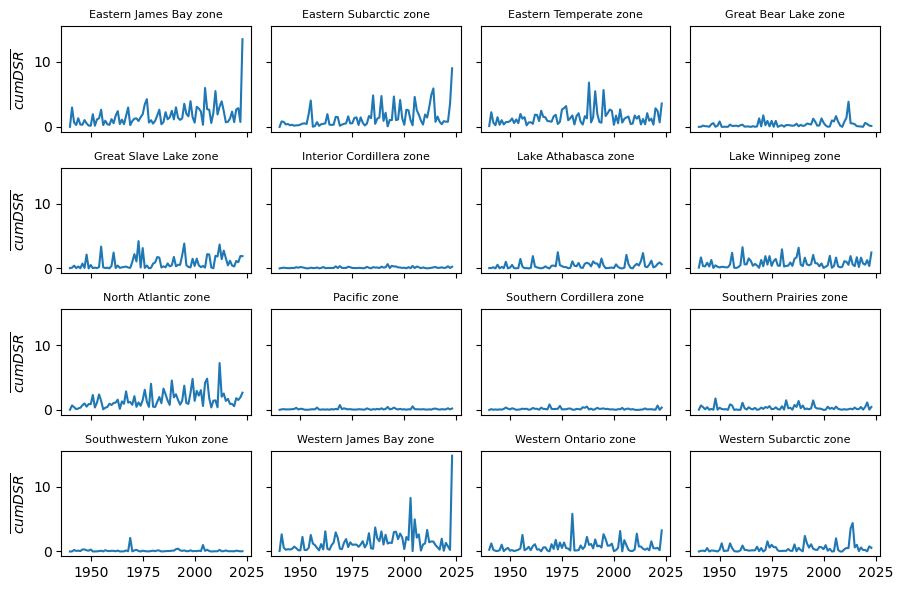

In [4]:
regions = xr.open_dataset('HFRZ.nc')
valid_codes = np.unique(regions.region_codes)[:-1]
valid_names = np.unique(regions.region_names)[:-1]

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(9,6), sharex=True, sharey=True)

for i,ax in enumerate(axs.ravel()):
    code = valid_codes[i]
    name = valid_names[i]
    df = pd.read_csv(f'cumdsr_by_hfrz/cumdsr_{code}.csv')
    ax.plot(df.year, df.cumDSRmean)
    ax.set_title(name, fontsize = 8)
    if i%4==0:
        ax.set_ylabel('$ \overline{cumDSR} $')
plt.tight_layout()
plt.savefig('cumDSR_HFRZ.png', facecolor = 'white', bbox_inches = 'tight')
plt.show()

### BUILDING THE MASKS:

In [1]:
import warnings
import pandas as pd
import time
import xarray as xr
import sys
import rioxarray as rxr
from rasterio import features
import numpy as np
from affine import Affine
import geopandas as gpd
import matplotlib.pyplot as plt
import sklearn.metrics

In [2]:
def transform_from_latlon(lat, lon):
    lat = np.asarray(lat)
    lon = np.asarray(lon)
    trans = Affine.translation(lon[0], lat[0])
    scale = Affine.scale(lon[1] - lon[0], lat[1] - lat[0])
    return trans * scale

In [3]:
def rasterize(shapes, coords, fill=np.nan, **kwargs):
    """
    Rasterize a list of (geometry, fill_value) tuples onto the given
    xarray coordinates. This only works for 1d latitude and longitude
    arrays.
    """
    transform = transform_from_latlon(coords['latitude'], coords['longitude'])
    out_shape = (len(coords['latitude']), len(coords['longitude']))
    raster = features.rasterize(shapes, out_shape=out_shape,
                                fill=fill, transform=transform,
                                dtype=float, **kwargs)
    return xr.DataArray(raster, coords=coords, dims=('latitude', 'longitude'))

In [4]:
data_path = ('/rds/general/user/tk22/projects/leverhulme_wildfires_physics/'+
             'live/tk/era5/hurs_era5_19400101_20230615.nc')
shape_path = f'/rds/general/user/tk22/home/wwa_project/hfr_canada/REDCAP_FMW_20000kha.shp'

In [5]:
gdf = gpd.read_file(shape_path)

In [6]:
level_codes = 'NAMES_SHOR'
level_names = 'NAMES'
scale = 'HFRZ'

In [7]:
gdf = gpd.read_file(shape_path)

In [8]:
gdf

,grid60km_n,NAMES,NAMES_SHOR,geometry
0,1.0,Eastern Subarctic zone,ES,"MULTIPOLYGON (((7009163.013 2068388.233, 70052..."
1,2.0,Great Slave Lake zone,GSL,"POLYGON ((5030000.000 3440000.000, 5030000.000..."
2,3.0,Southern Cordillera zone,SC,"MULTIPOLYGON (((3953764.853 2180000.000, 39535..."
3,4.0,Lake Winnipeg zone,LW,"MULTIPOLYGON (((6002299.769 1445412.827, 60028..."
4,5.0,Eastern Temperate zone,ET,"MULTIPOLYGON (((7174167.066 1046646.077, 71736..."
5,6.0,Lake Athabasca zone,LA,"POLYGON ((5330000.000 3080000.000, 5330000.000..."
6,7.0,Eastern James Bay zone,EJB,"MULTIPOLYGON (((7077979.485 1896126.044, 70739..."
7,8.0,Interior Cordillera zone,IC,"POLYGON ((4550000.000 3320000.000, 4550000.000..."
8,9.0,Western Ontario zone,WO,"MULTIPOLYGON (((6030027.208 1460000.000, 60290..."
9,10.0,Western Subarctic zone,WS,"POLYGON ((5002866.263 3663625.749, 5005440.760..."


In [9]:
gdf = gdf.to_crs(epsg = 4326)

In [12]:
gdf.to_file('HFRZ_EPSG4326.shp')

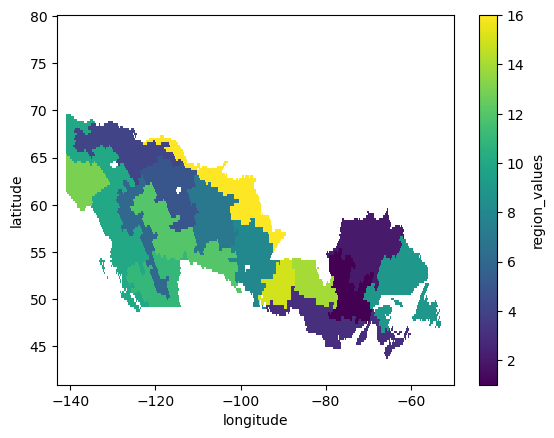

In [37]:
ds = xr.open_dataset(data_path)

gdf = gpd.read_file(shape_path)
gdf = gdf.to_crs(epsg = 4326)
unique_ids = list(np.unique(gdf[level_code]))

shapes = [(shape, n) for n, shape in enumerate(gdf.geometry)]
ids = np.array([(ID, n) for n, ID in enumerate(gdf[level_codes])])
mask = xr.Dataset(coords={'latitude':  np.array(ds.latitude),
                          'longitude': np.array(ds.longitude)})

mask['region_values'] = rasterize(shapes, mask.coords).astype(float)
mask['region_codes'] = mask['region_values'].astype(str)
mask['region_names'] = mask['region_values'].astype(str)

# Naming regions:
for region in np.unique(gdf[level_codes]):
    indices = np.array(ids[ids[:,0] == region][:,1], dtype = float)
    mask['region_codes'].values[np.isin(mask['region_values'].values,
                                           indices)] = region

ids = np.array([(ID, n) for n, ID in enumerate(gdf[level_names])])

# Naming regions:
for region in np.unique(gdf[level_names]):
    indices = np.array(ids[ids[:,0] == region][:,1], dtype = float)
    mask['region_names'].values[np.isin(mask['region_values'].values,
                                           indices)] = region
    
# Reapplying codes:
code = 0
for region in np.unique(mask['region_codes']):
    code += 1
    mask['region_values'].values[np.array(mask['region_codes'] == region)] = code
mask['region_values'].values[np.array(mask['region_codes'] == 'nan')] = np.nan

mask.region_values.plot()

mask.to_netcdf(f'/rds/general/user/tk22/home/wwa_project/{scale}.nc')

----

In [ ]:
"""Operations on cartesian geographical grid."""
import numpy as np

EARTH_RADIUS = 6371000.0  # m


def _guess_bounds(points, bound_position=0.5):
    """
    Guess bounds of grid cells.
    
    Simplified function from iris.coord.Coord.
    
    Parameters
    ----------
    points: numpy.array
        Array of grid points of shape (N,).
    bound_position: float, optional
        Bounds offset relative to the grid cell centre.
    Returns
    -------
    Array of shape (N, 2).
    """
    diffs = np.diff(points)
    diffs = np.insert(diffs, 0, diffs[0])
    diffs = np.append(diffs, diffs[-1])

    min_bounds = points - diffs[:-1] * bound_position
    max_bounds = points + diffs[1:] * (1 - bound_position)

    return np.array([min_bounds, max_bounds]).transpose()


def _quadrant_area(radian_lat_bounds, radian_lon_bounds, radius_of_earth):
    """
    Calculate spherical segment areas.
    Taken from SciTools iris library.
    Area weights are calculated for each lat/lon cell as:
        .. math::
            r^2 (lon_1 - lon_0) ( sin(lat_1) - sin(lat_0))
    The resulting array will have a shape of
    *(radian_lat_bounds.shape[0], radian_lon_bounds.shape[0])*
    The calculations are done at 64 bit precision and the returned array
    will be of type numpy.float64.
    Parameters
    ----------
    radian_lat_bounds: numpy.array
        Array of latitude bounds (radians) of shape (M, 2)
    radian_lon_bounds: numpy.array
        Array of longitude bounds (radians) of shape (N, 2)
    radius_of_earth: float
        Radius of the Earth (currently assumed spherical)
    Returns
    -------
    Array of grid cell areas of shape (M, N).
    """
    # ensure pairs of bounds
    if (
        radian_lat_bounds.shape[-1] != 2
        or radian_lon_bounds.shape[-1] != 2
        or radian_lat_bounds.ndim != 2
        or radian_lon_bounds.ndim != 2
    ):
        raise ValueError("Bounds must be [n,2] array")

    # fill in a new array of areas
    radius_sqr = radius_of_earth ** 2
    radian_lat_64 = radian_lat_bounds.astype(np.float64)
    radian_lon_64 = radian_lon_bounds.astype(np.float64)

    ylen = np.sin(radian_lat_64[:, 1]) - np.sin(radian_lat_64[:, 0])
    xlen = radian_lon_64[:, 1] - radian_lon_64[:, 0]
    areas = radius_sqr * np.outer(ylen, xlen)

    # we use abs because backwards bounds (min > max) give negative areas.
    return np.abs(areas)


def grid_cell_areas(lon1d, lat1d, radius=EARTH_RADIUS):
    """
    Calculate grid cell areas given 1D arrays of longitudes and latitudes
    for a planet with the given radius.
    
    Parameters
    ----------
    lon1d: numpy.array
        Array of longitude points [degrees] of shape (M,)
    lat1d: numpy.array
        Array of latitude points [degrees] of shape (M,)
    radius: float, optional
        Radius of the planet [metres] (currently assumed spherical)
    Returns
    -------
    Array of grid cell areas [metres**2] of shape (M, N).
    """
    lon_bounds_radian = np.deg2rad(_guess_bounds(lon1d))
    lat_bounds_radian = np.deg2rad(_guess_bounds(lat1d))
    area = _quadrant_area(lat_bounds_radian, lon_bounds_radian, radius)
    return area

da = xr.open_dataset('/rds/general/user/tk22/projects/leverhulme_wildfires_'+
                     'physics/live/tk/era5/fwi_era5_19400101_20230630.nc')['fwi']

area = grid_cell_areas(da.longitude.data, da.latitude.data, radius=EARTH_RADIUS)

output = xr.Dataset(data_vars = {'cell_area': (['latitude', 'longitude'], area)},
                    coords = {'latitude': da.latitude.data,
                              'longitude': da.longitude.data})
output.to_netcdf('cell_area.nc')